# Significant earthquakes since 2150 B.C.

In [22]:
import numpy as np
import pandas as pd

# 1.1
FilePath = "C:\\Users\\ljn\\Desktop\\earthquakes-2022-10-18_18-50-02_+0800.tsv"
Sig_Eqs = pd.read_csv(FilePath, sep = "\t");

# get country list
location = Sig_Eqs['Location Name']
country_lst = []
for i in range(len(location)):
    country = str(location[i])
    index = country.find(':')
    if(index != -1):
        country = country[:index]
    country_lst.append(country)
# add country list to Sig_Eqs
Sig_Eqs.insert(loc=0,column = 'country', value=country_lst)
# group by country and sum
result = Sig_Eqs.groupby(['country']).sum()
result = pd.DataFrame(result)
result = result.sort_values("Deaths", ascending = False)
result = result['Deaths']
# print the top 20 countries along with the total number of deaths.
print(result.head(20))

country
CHINA           2075019.0
TURKEY          1094479.0
IRAN             995403.0
ITALY            498477.0
SYRIA            369224.0
HAITI            323474.0
AZERBAIJAN       317219.0
JAPAN            277142.0
ARMENIA          191890.0
ISRAEL           160120.0
PAKISTAN         145080.0
ECUADOR          135479.0
IRAQ             120200.0
TURKMENISTAN     117412.0
PERU             101511.0
PORTUGAL          83506.0
GREECE            79278.0
CHILE             64269.0
INDIA             61940.0
TAIWAN            57134.0
Name: Deaths, dtype: float64


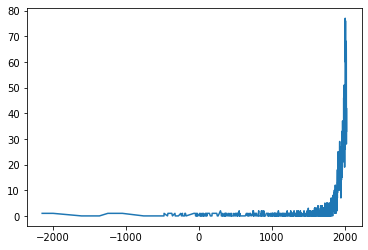

In [3]:
#1.2
from matplotlib import pyplot as plt
%matplotlib inline

# group by Year
result = Sig_Eqs.groupby(['Year'])
x_year = []
y_times = []
for name,group in result:
    x_year.append(name)
    group = pd.DataFrame(group)
    times = group['Mag'][group['Mag']>3].count()
    y_times.append(times)

plt.plot(x_year,y_times)

In [25]:
#1.3
def CountEq_LargestEq(country,data):
    for name,group in data.groupby(['country']):
        if name == country:
            #maxEq = max(group["Mag"])
            index = group["Mag"].idxmax()
            if(str(index) == "nan"):
                time = "nan"
                location = "nan"
            else:
                year = str(group.loc[index]["Year"])
                month = str(group.loc[index]["Mo"])
                day = str(group.loc[index]["Dy"])
                time = year+"-"+month+"-"+day
                location = group.loc[index]["Location Name"]
            #print(maxEq,group["Mag"].index(maxEq))
            return len(group),time,location

countrylst = pd.unique(Sig_Eqs["country"])
Eq_numlst = []
timelst = []
locationlst = []
cclst = []
for i in countrylst:
    if i == "nan":
        continue
    count,time,location = CountEq_LargestEq(i, Sig_Eqs)
    Eq_numlst.append(count)
    timelst.append(time)
    locationlst.append(location)
    cclst.append(i)
result = {"country":cclst,
          "count":Eq_numlst,
          "time":timelst,
          "location":locationlst}
result = pd.DataFrame(result)
result.sort_values(by = "count",ascending = False)

,country,count,time,location
16,CHINA,616,1668.0-7.0-25.0,CHINA: SHANDONG PROVINCE
83,INDONESIA,388,2004.0-12.0-26.0,INDONESIA: SUMATRA: ACEH: OFF WEST COAST
8,IRAN,384,856.0-12.0-22.0,"IRAN: DAMGHAN, QUMIS"
37,JAPAN,351,2011.0-3.0-11.0,JAPAN: HONSHU
5,ITALY,330,1915.0-1.0-13.0,"ITALY: MARSICA, AVEZZANO, ABRUZZI"
...,...,...,...,...
62,IRELAND,1,nan,nan
61,SOUTH COASTS OF ASIA MINOR,1,nan,nan
211,KIRIBATI,1,1905.0-6.0-30.0,KIRIBATI: PHOENIX ISLANDS
53,"SAGAMI, JAPAN",1,1331.0-8.0-15.0,"SAGAMI, JAPAN"


# Air temperature in Shenzhen during the past 25 years

<ipython-input-91-d3200f2f6ef8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Baoan_Weather_filter["temp"] = Baoan_Weather_filter["TMP"].str[:-2]
<ipython-input-91-d3200f2f6ef8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Baoan_Weather_filter["temp"] = Baoan_Weather_filter["temp"].astype(float)
<ipython-input-91-d3200f2f6ef8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

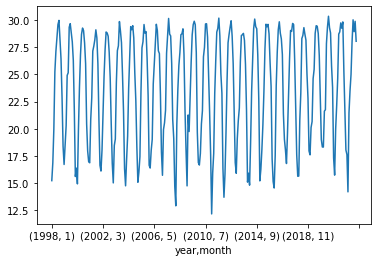

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Baoan_Weather = pd.read_csv("Baoan_Weather_1998_2022.csv")
# filter data
Baoan_Weather_filter = Baoan_Weather.loc[Baoan_Weather['TMP'].str.contains(",1")]
# convert TMP 
Baoan_Weather_filter["temp"] = Baoan_Weather_filter["TMP"].str[:-2]
Baoan_Weather_filter["temp"] = Baoan_Weather_filter["temp"].astype(float)
Baoan_Weather_filter["temp"] = Baoan_Weather_filter["temp"].map(lambda x : x/10.0)
# get year and month
Baoan_Weather_filter["year"] = pd.to_datetime(Baoan_Weather_filter["DATE"]).dt.year
Baoan_Weather_filter["month"] = pd.to_datetime(Baoan_Weather_filter["DATE"]).dt.month
# plot result
Baoan_Weather_month = Baoan_Weather_filter.groupby(["year","month"])["temp"].mean().plot()

# Global collection of hurricanes

In [69]:
# 3.1
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])
namelst = []
wmo_windlst = []
sidlst = []
# group by SID
for SID,group in df.groupby(["SID"]):
    max_wind = 0
    for i in group["WMO_WIND"]:
        if(i == " "):
            continue
        else:
            temp = int(i)
            max_wind = max_wind if max_wind>=temp else temp # get max wind in a group
    namelst.append(group["NAME"].iloc[0])
    sidlst.append(SID)
    wmo_windlst.append(max_wind)
    
data = {"SID":sidlst,
        "name":namelst,
        "wmo_wind":wmo_windlst}
data = pd.DataFrame(data)
data.sort_values(by = "wmo_wind", ascending = False).head(10)

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SID,name,wmo_wind
12921,2015293N13266,PATRICIA,185
9087,1980214N11330,ALLEN,165
11067,1997253N12255,LINDA,160
11944,2005289N18282,WILMA,160
13307,2019236N10314,DORIAN,160
10011,1988253N12306,GILBERT,160
4105,1935241N23291,NaN,160
11190,1998295N12284,MITCH,155
13098,2017242N16333,IRMA,155
12337,2009288N07267,RICK,155


<AxesSubplot:xlabel='SID'>

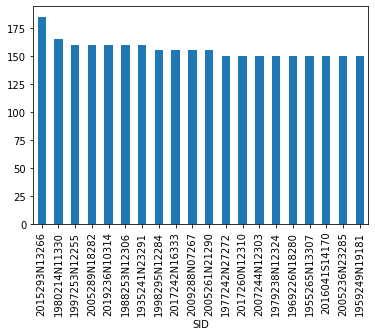

In [81]:
# 3.2
data_20 = data.sort_values(by = "wmo_wind", ascending = False).head(20)
data_20 = data_20.set_index("SID")
data_20["wmo_wind"].plot(kind = "bar")

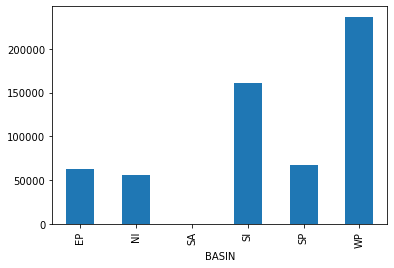

In [86]:
# 3.3
df_basin = df.groupby(["BASIN"])["LAT"].count().plot(kind='bar')

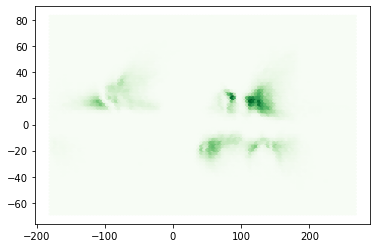

In [92]:
# 3.4
lon = df["LON"]
lat = df["LAT"]
plt.hexbin(lon, lat,cmap="Greens")

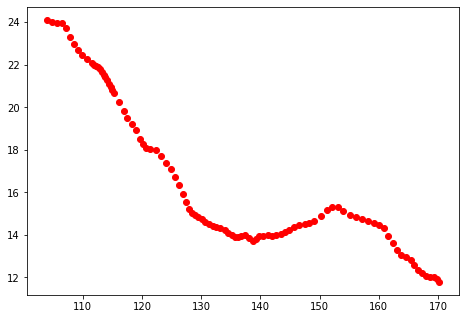

In [93]:
# 3.5
df_name = df.groupby(["NAME"])
for name,group in df_name:
    if(name == "MANGKHUT"):
        df_mangkhut = group
df_mangkhut = df_mangkhut.loc[df_mangkhut["ISO_TIME"].astype(str).str.contains("2018-")]
lon = df_mangkhut["LON"]
lat = df_mangkhut["LAT"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(lon,lat,color = 'r')
plt.show()

In [94]:
# 3.6 
df_1970 = df.loc[df["SEASON"] > 1969] 
df_1970_basin = df_1970.loc[(df["BASIN"] == "WP") | (df["BASIN"] == "EP")]

<ipython-input-95-6d8f673a27de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1970_basin["ISO_TIME"] = pd.to_datetime(df_1970_basin["ISO_TIME"]).dt.date


<AxesSubplot:xlabel='ISO_TIME'>

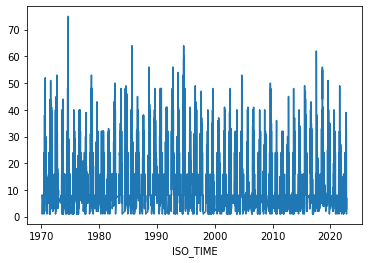

In [95]:
# 3.7
df_1970_basin["ISO_TIME"] = pd.to_datetime(df_1970_basin["ISO_TIME"]).dt.date
df_1970_basin.groupby(["ISO_TIME"])["LON"].count().plot()

In [97]:
# 3.8
def calculate_dayofyear(time):
    # time = "2018-03-19"
    year = int(time[:4])
    month = int(time[5:7])
    day = int(time[-2:])
    month_days=[0,31,28,31,30,31,30,31,31,30,31,30,31]
    days = day
    for i in range(month):
        days += month_days[i]
    if(((year%4 == 0 and year%100 != 0) or (year%400==0)) and month > 2):
        days += 1
    if(days >=100):
        days = str(days)
    else:
        days = "0" + str(days)
    return time[:4]+days

df_1970_basin["day_of_year"] = df_1970_basin["ISO_TIME"].apply(lambda x: calculate_dayofyear(str(x)))

def day_of_year(data):
    #time = 2022285
    data_group = data.groupby(["day_of_year"])
    time = []
    count = []
    for name,group in data_group:
        time.append(name)
        count.append(len(group))
    return time,count

TIME,COUNT = day_of_year(df_1970_basin)
data3_8 = {"time":TIME,
           "count":COUNT}
data3_8 = pd.DataFrame(data3_8)
data3_8

<ipython-input-97-5fed21df332b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1970_basin["day_of_year"] = df_1970_basin["ISO_TIME"].apply(lambda x: calculate_dayofyear(str(x)))


,time,count
0,1970050,8
1,1970051,8
2,1970052,8
3,1970053,8
4,1970054,8
...,...,...
10812,2022277,9
10813,2022278,7
10814,2022282,1
10815,2022283,7


In [98]:
# 3.9
mean = data3_8["count"].mean()
data3_8["anomaly"] = data3_8.apply(lambda x:x["count"] - mean,axis = 1);
data3_8

,time,count,anomaly
0,1970050,8,-8.303226
1,1970051,8,-8.303226
2,1970052,8,-8.303226
3,1970053,8,-8.303226
4,1970054,8,-8.303226
...,...,...,...
10812,2022277,9,-7.303226
10813,2022278,7,-9.303226
10814,2022282,1,-15.303226
10815,2022283,7,-9.303226


In [99]:
# 3.10
data_group = df_1970_basin.groupby(["SEASON"]) #Resample to year
count_10 = []
year_10 = []
for name,group in data_group:
    year_10.append(name)
    count_10.append(len(group))
    
data3_10 = {"year":year_10,
            "count":count_10}
data3_10 = pd.DataFrame(data3_10)
mean = data3_10["count"].mean()
data3_10["anomaly"] = data3_10.apply(lambda x:x["count"] - mean,axis = 1);
data3_10

,year,count,anomaly
0,1970,3555,227.603774
1,1971,4459,1131.603774
2,1972,3952,624.603774
3,1973,2407,-920.396226
4,1974,3581,253.603774
5,1975,2686,-641.396226
6,1976,3341,13.603774
7,1977,2498,-829.396226
8,1978,4027,699.603774
9,1979,3238,-89.396226


# Explore a data set

In [104]:
# 4.1
water_lever = pd.read_excel("33.xls")
water_lever = water_lever.loc[(water_lever["interp_h"] < 5)] # filter error water lever
water_lever.head()

,time,h_interp,dem,slope,cloud,dem_flag,interp_h,band,x,y
0,2019-01-01,3151.710449,3148.929932,0.000159,0,2,2.780518,s1,100.442276,37.030445
1,2019-01-01,3151.803711,3148.930664,-0.000039,0,2,2.873047,w1,100.441368,37.030514
2,2019-01-01,3151.690918,3148.927979,-0.000209,0,2,2.762939,s1,100.442383,37.031342
3,2019-01-01,3151.773926,3148.928467,0.000024,0,2,2.845459,w1,100.441475,37.031414
4,2019-01-01,3151.701904,3148.925293,0.000433,0,2,2.776611,s1,100.442490,37.032242


<AxesSubplot:xlabel='time'>

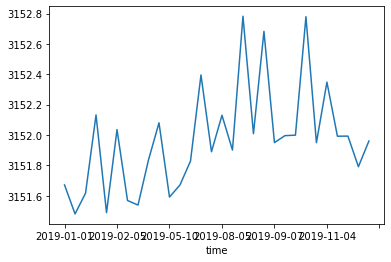

In [105]:
wl_day = water_lever.groupby(["time"]).mean()
wl_day["h_interp"].plot()

In [107]:
mean_year = wl_day["h_interp"].mean()
max_year = wl_day["h_interp"].max()
min_year = wl_day["h_interp"].min()
std_year = wl_day["h_interp"].std()
median_year = wl_day["h_interp"].median()
print("mean = {}, max = {}, min = {}, std ={}, median = {}".format(mean_year,max_year,min_year,std_year,median_year))
# I found the annual change of water lever is 1.3m(in ICESat-2's observation data).

mean = 3151.9692215759615, max = 3152.782080321051, min = 3151.479856654576, std =0.35074725268310497, median = 3151.9548389249685
